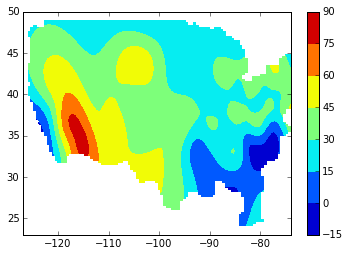

Max location (1515, 0)
Iteration 0
0.834086894989
Acquisition Insides:
<Chosen>
Mean: [[ 46.15138379]]
Var: [ 50.009999]
Final value: [[ 246.1913798]]
Index 5707
<Best>
Mean: [[ 46.15138379]]
Var: [ 50.009999]
Final value: [[ 246.1913798]]
[ 1 50  1]
   status: 0
  success: True
     nfev: 68
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      fun: array([[ 7.62509377]])
        x: array([  1.        ,  10.9508106 ,   0.21958911])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
      jac: array([  0.00000000e+00,   2.13162821e-06,  -8.88178420e-08])
      nit: 5
Iteration 1
0.788470983505
Acquisition Insides:
<Chosen>
Mean: [[ 37.79640978]]
Var: [ 10.64043877]
Final value: [[ 80.35816487]]
Index 529
<Best>
Mean: [[ 35.198439]]
Var: [ 10.95301202]
Final value: [[ 79.01048707]]
[  1.          10.9508106    0.21958911]
   status: 0
  success: True
     nfev: 44
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      fun: array([[ 9.36138092]])
        x: arra

In [1]:
import gaussian_process, covariance_functions, acquisition_functions, bayesian_optimization, sys, datasets, utils
import numpy as np
import matplotlib.pyplot as p
from functools import partial
%matplotlib inline


data, X_range, X, Y, Z, is_us = datasets.load_data("ozone", True)

#plot the data
p.contourf(X, Y, Z)
p.colorbar()
p.show()

#parameters gaussian process
dimensions = 2
noise = 1
cov_func = covariance_functions.gaussian_kernel
cov_grad = covariance_functions.gaussian_kernel_gradient
width = 1
amp = 50

#initialize gaussian process
gp = gaussian_process.GP_Regressor(dimensions, noise, cov_func, cov_grad, [width, amp])


print 'Max location', np.unravel_index(np.argmax(data), data.shape)

#parameters bayesian optimization
iterations = 10
goal_func = partial(utils.usa_goal_func, data=data, X_range=X_range)
#goal_func = (lambda x: data[utils.get_usa_index(X_range, x)][np.newaxis, :] + np.random.normal(0,1))

acqui_func = acquisition_functions.get_function("UCB", kappa=4, gamma=-0.1)

bounds = [(0.01, 20), (0.01, 1000), (0.01, 100)]

#execute bayesian optimization
gp, gp_list, s_list = bayesian_optimization.bayesian_optimization(gp, iterations, goal_func, acqui_func, X_range, bounds, save_every=3)

(6299, 2)
(1, 2)
(4, 2)
(4, 1)
(100, 100) (100, 100) (6299,) (6299,)


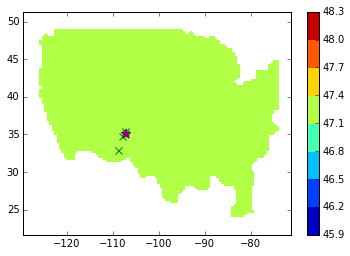

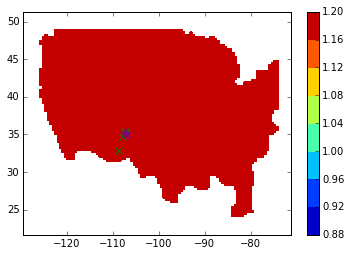

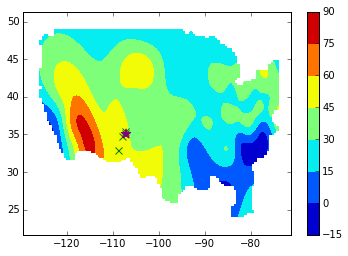

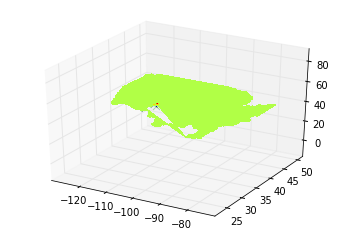

[[-107.19191919   35.        ]] [[ 45.35990432]]
(1, 2)
(7, 2)
(7, 1)
(100, 100) (100, 100) (6299,) (6299,)


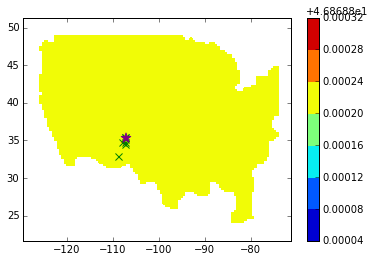

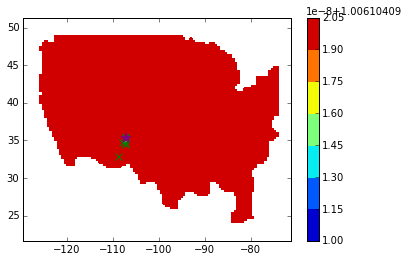

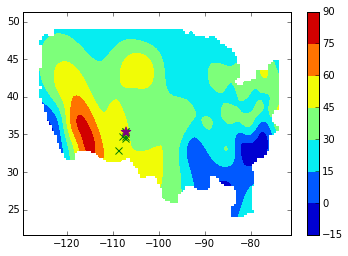

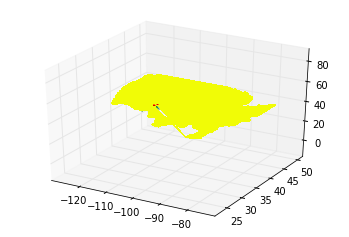

[[-107.19191919   35.27272727]] [[ 45.88826986]]
(1, 2)
(10, 2)
(10, 1)
(100, 100) (100, 100) (6299,) (6299,)


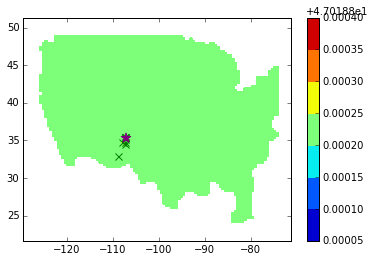

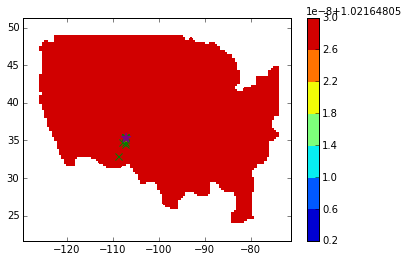

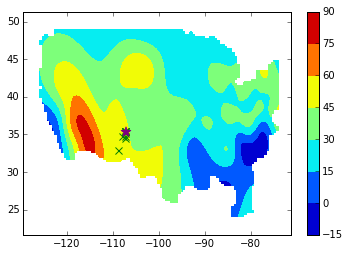

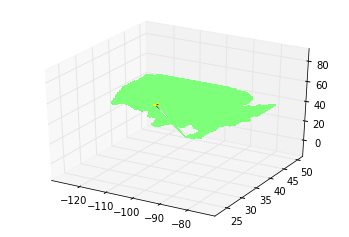

[[-107.19191919   35.27272727]] [[ 46.56095676]]


In [2]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

print X_range.shape
h, w = X_range.shape
for i in range(len(gp_list)):

    gpi = gp_list[i]
    X_new, Y_new = s_list[i]
    print X_new.shape
    mean = np.zeros((X_range.shape[0], 1))
    var = np.zeros((X_range.shape[0], 1))
    for j in range(X_range.shape[0]):
        mean[j], var[j] = gpi.predict(X_range[j, :][np.newaxis, :])
    print gpi.Xtrain.shape
    print gpi.Ytrain.shape
    print Z.shape, is_us.shape, mean.flatten().shape, var.flatten().shape
    Z[is_us] = mean.flatten()
    p.contourf(X,Y,Z)                  # GP mean
    p.colorbar()
    p.scatter(gpi.Xtrain[:,0],gpi.Xtrain[:,1],color='green',marker='x', s=50) # training data
    p.scatter(X_new[:,0],X_new[:,1],color='purple',marker='*', s=100)   # test data
    p.show()
    Z[is_us] = var.flatten() ** 0.5
    p.contourf(X,Y,Z)                # GP mean
    p.colorbar()
    p.scatter(gpi.Xtrain[:,0],gpi.Xtrain[:,1],color='green',marker='x', s=50) # training data
    p.scatter(X_new[:,0],X_new[:,1],color='purple',marker='*', s=100)   # test data
    p.show()
    Z[is_us] = data.flatten()
    p.contourf(X,Y,Z)                  # GP mean
    p.colorbar()
    p.scatter(gpi.Xtrain[:,0],gpi.Xtrain[:,1],color='green',marker='x', s=50) # training data
    p.scatter(X_new[:,0],X_new[:,1],color='purple',marker='*', s=100)   # test data
    p.show()
    
    Z[is_us] = mean.flatten()
    fig = p.figure()
    ax = fig.gca(projection='3d')
    #surf = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap=cm.coolwarm,
    #                   linewidth=0, antialiased=False)   
    ax.contourf(X,Y,Z)
    #fig.colorbar(surf, shrink=0.5, aspect=5) 
    ax.set_zlim(-15, 90)
    #p.colorbar()
    ax.scatter(gpi.Xtrain[:,0],gpi.Xtrain[:,1], gpi.Ytrain_original, color='green',marker='x', s=50) # training data
    #p.scatter(X_new[:,0],X_new[:,1],color='purple',marker='*', s=100)   # test data
    p.show()
    print X_new, Y_new    

(788, 2) (788, 1)
(6299, 6299)


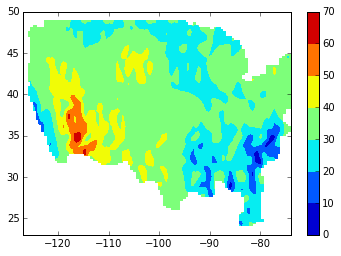

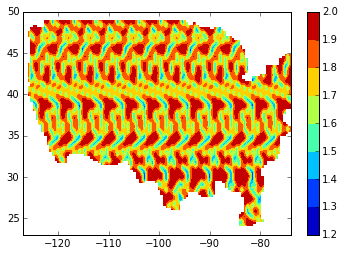

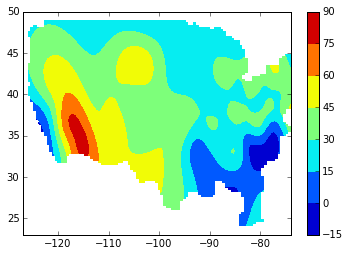

yay


In [6]:
gp = gaussian_process.GP_Regressor(2, 0, cov_func, cov_grad, [1.5, 1])
print X_range[::8,:].shape, data[::8,:].shape
gp.update(X_range[::8,:], data[::8,:])
mean, var = gp.predict(X_range) #[j, :][np.newaxis, :]
print var.shape
Z[is_us] = mean.flatten()
p.contourf(X,Y,Z)                  # GP mean
p.colorbar()
p.show()
Z[is_us] = np.diag(var).flatten()
p.contourf(X,Y,Z)                # GP mean
p.colorbar()
p.show()
Z[is_us] = data.flatten()
p.contourf(X,Y,Z)                  # GP mean
p.colorbar()
p.show()
print "yay"

## OLD STUFF

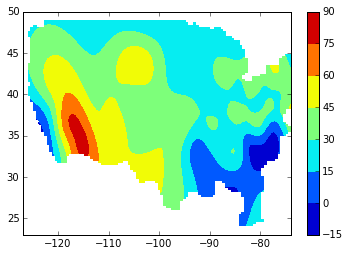

(6299,)


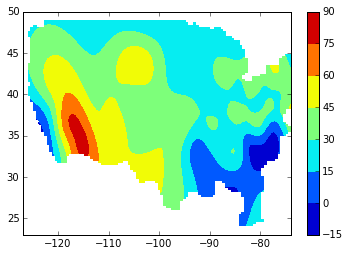

'\n\ngeolocator = geopy.Nominatim()\n#print geolocator.reverse(ozone[:,[1,0]])\nfor i in range(ozone.shape[0]):\n    #print ozone[i,0:2]\n    address, (latitude, longitude) = geolocator.reverse((ozone[i,1], ozone[i,0]))\n    if address:\n        address = address.split(",")\n        print "%s" % (address[-1])\n    time.sleep(1)\n'

In [103]:
import gaussian_process, covariance_functions, acquisition_functions, bayesian_optimization, sys, datasets
import time

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
from numpy import linspace, meshgrid
from matplotlib.mlab import griddata
import scipy.interpolate
import geopy
from geopy.exc import GeocoderTimedOut


def grid(xy, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    x = xy[:,0]
    y = xy[:,1]
    xi = linspace(-127.0, -74.0, resX)
    yi = linspace(23.0, 50.0, resY)
    X, Y = meshgrid(xi, yi)
    #Z = griddata(x, y, z, xi, yi)
    #Z = scipy.interpolate.griddata(xy, z, (X, Y), method=method)
    rbf_func = scipy.interpolate.Rbf(x, y, z, smooth=0.001)
    Z = rbf_func(X, Y)
    return X, Y, Z


not_us = []
with open("meshgrid_USA_all") as f:
    for line in f:
        state = line.split(",")[1]
        not_us.append(state != " United States of America\n" and state != "United States of America\n")
        
not_us = np.array(not_us).reshape((100,100))
ozone = datasets.load_data("ozone")
#X, Y, Z = grid(ozone[:,0:2], ozone[:,2], method='linear')
is_us = np.invert(not_us)
"""
f = open("meshgrid_USA", 'w')

xf = X.flatten()
yf = Y.flatten()

#for i in range(60):
    #f.write(str(Y.flatten()[i]) + str(X.flatten()[i]) + "\n")
#f.close()

geolocator = geopy.Nominatim(timeout=10)
for i in range(6210, len(xf)):
    #try:
    address, (latitude, longitude) = geolocator.reverse((yf[i], xf[i]))
    if address == None:
        print str(i) + ", None"
        f.write((str(i)+",None\n").encode('ascii', 'ignore'))
    else:
        address = address.split(",")
        print str(i) + ", %s" % (address[-1])
        f.write((str(i)+",%s\n" % (address[-1])).encode('ascii', 'ignore'))
    #except GeocoderTimedOut as e: 
    #    print("Error: geocode failed on input %s with message %s"%(my_address, e.msg))
    time.sleep(1.1)
    
f.close()
"""

X, Y, Z = grid(ozone[:,0:2], ozone[:,2])
Z[not_us] = np.nan
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

x = X[is_us]
y = Y[is_us]
z = Z[is_us]
print z.shape

plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()
"""

geolocator = geopy.Nominatim()
#print geolocator.reverse(ozone[:,[1,0]])
for i in range(ozone.shape[0]):
    #print ozone[i,0:2]
    address, (latitude, longitude) = geolocator.reverse((ozone[i,1], ozone[i,0]))
    if address:
        address = address.split(",")
        print "%s" % (address[-1])
    time.sleep(1)
"""